# Đồ án cuối kì Khoa học dữ liệu và Ứng dụng

## Giáo viên: Lê Ngọc Thành, Hoàng Xuân Trường

### Sinh viên: 
- Huỳnh Minh Châu 1712298
- Đào Duy Tuấn 1712869

---

## Mục lục

---

## Import

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates
from datetime import datetime as dt # thao tác với ngày tháng
from datetime import timezone as tz # thao tác với ngày tháng
# import mplfinance as mpf # trực quan hoá dữ liệu tài chính

---

## Thu thập dữ liệu

- Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn
nào?
- Người ta có cho phép bạn dùng dữ liệu như này
không? Ví dụ, bạn có thể xem thử license của dữ
liệu là gì (ví dụ, với dữ liệu ở BT01, ở mục
“Overview”, bạn sẽ thấy dòng “Data has been
released under a CC 2.0 license”). Nếu bạn dùng dữ
liệu ở Kaggle và bạn chỉ dùng cho mục đích học thì
nhìn chung sẽ không có vấn đề gì; tuy nhiên, mục
đích ở đây là mình muốn bạn lưu ý đến vấn đề về
tính hợp lệ khi bạn sử dụng dữ liệu.
- Người ta thu thập dữ liệu như thế nào?

In [2]:
company_dict = {'AAPL': 'APPLE', 'AMZN': 'AMAZON', 'FB': 'FACEBOOK', 
                'GOOGL': 'GOOGLE', 'IBM': 'IBM', 'MSFT': 'MICROSOFT', 
                'NFLX': 'NETFLIX', 'TSLA': 'TESLA'}

daily_stock_df = pd.concat((pd.read_csv('./data/daily/daily_' + company + '.csv', index_col=0) 
                    for company in company_dict.keys()), keys=company_dict.values(), names=['company'])

---

## Khám phá dữ liệu

Dùng cả text và code để trình bày những thông tin
sau về dữ liệu:
- Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
- Mỗi dòng có ý nghĩa gì?
- Mỗi cột có ý nghĩa gì? Kiểu dữ liệu? Miền giá trị (đối
với cột dạng numeric hoặc datetime)? Các giá trị có
thể có (đối với cột dạng categorical)?
- Dữ liệu có vấn đề gì không? Ví dụ, có cột nào cần
chuyển đổi kiểu dữ liệu không, có giá trị thiếu không,
có giá trị bất thường không, ...

Số dòng, cột dữ liệu của mỗi công ty được thu thập dữ liệu.

In [3]:
shape_df = pd.DataFrame(data=[[df.shape[0] for _, df in daily_stock_df.groupby(level=0)], 
                              [df.shape[1] for _, df in daily_stock_df.groupby(level=0)]], 
                        index=['row', 'col'], columns=company_dict.values())
shape_df

,APPLE,AMAZON,FACEBOOK,GOOGLE,IBM,MICROSOFT,NETFLIX,TESLA
row,5535,5571,2167,4120,5624,5603,4685,2645
col,7,7,7,7,7,7,7,7


Bảng thể hiện dòng đầu tiên trong bảng dữ liệu của mỗi công ty.

In [4]:
sample_df = pd.DataFrame(data=[df.iloc[0] for _, df in daily_stock_df.groupby(level=[0])], 
                         index=company_dict.values(), columns=daily_stock_df.columns)
sample_df

,Date,Open,High,Low,Close*,Adj Close**,Volume
APPLE,"Dec 24, 2020",3193.90,3202.00,3169.00,3172.69,3172.69,1451900
AMAZON,"Dec 24, 2020",131.32,133.46,131.10,131.97,131.97,54930100
FACEBOOK,"Dec 24, 2020",268.88,270.40,266.20,267.40,267.40,6702000
GOOGLE,"Dec 24, 2020",1729.00,1742.41,1724.35,1734.16,1734.16,465600
IBM,"Dec 24, 2020",125.00,125.10,124.21,124.69,124.69,1761100
MICROSOFT,"Dec 24, 2020",221.42,223.61,221.20,222.75,222.75,10550600
NETFLIX,"Dec 24, 2020",515.12,519.35,512.21,513.97,513.97,1144000
TESLA,"Dec 24, 2020",642.99,666.09,641.00,661.77,661.77,22865600


In [5]:
daily_stock_df.sample(5)

Date    Open    High     Low  Close* Adj Close**  \
company                                                                    
MICROSOFT 4545  Mar 14, 2003   24.68   24.96   24.26   24.86       15.88   
          4549  Mar 10, 2003   23.31   23.46   22.89   22.95       14.66   
IBM       3483  May 17, 2007  105.61  106.23  104.73  105.31       70.11   
GOOGLE    3392  Jul 10, 2007  272.17  273.77  271.10  271.94      271.94   
MICROSOFT 584   Sep 13, 2018  112.12  113.73  112.12  112.91      109.62   

                  Volume  
company                   
MICROSOFT 4545  75451400  
          4549  48413600  
IBM       3483   7706400  
GOOGLE    3392   7704200  
MICROSOFT 584   26055600

---

## Tiền xử lý dữ liệu

Trước khi tìm hiểu ý nghĩa của dòng, cột, tiến hành chuẩn hoá tên cột cho tiện thao tác và ngược thứ tự các dòng dữ liệu, mẫu dữ liệu của ngày xa nhất có chỉ mục thấp nhất.

Chuẩn hoá tên cột gồm ký tự viết thường, loại bỏ ký tự đặc biệt, thay khoảng trắng thành '_'.

In [6]:
daily_stock_df.rename(lambda x: x.strip('*').replace(' ', '_').lower(), axis='columns', inplace=True)

Đảo ngược thứ tự các dòng dữ liệu.

In [7]:
for company in company_dict.values():
    daily_stock_df.loc[company] = daily_stock_df.loc[company][::-1].values
    # Khi không gán được giá trị cho df thì dùng values để đưa về mảng numpy mà gán!
    # https://stackoverflow.com/a/28432733

---

## Tiếp tục khám phá dữ liệu

<a id="col_meaning"></a>
Mỗi dòng trong DataFrame chứa dữ liệu của mỗi công ty là dữ liệu về giá chứng khoán và các chỉ số liên quan trong một ngày.

Mỗi bảng dữ liệu đều có 9 cột, có ý nghĩa như sau:

|Tên cột|Ý nghĩa|
|:------------- |:---------- |
|**date**|ngày của mỗi dòng dữ liệu, có định dạng `mmm dd, yyyy`|
|**open**|giá cổ phiếu ở phiên giao dịch đầu tiên trong ngày|
|**high**|giá cổ phiếu cao nhất trong ngày|
|**low**|giá cổ phiếu thấp trong ngày|
|**close**|giá cổ phiếu ở phiên giao dịch cuối cùng trong ngày và điều chỉnh giá nếu có tách cổ phiếu|
|**adj_close**|tương tự như **close** và tính thêm sự điều chỉnh sau khi chia cổ tức|
|**volume**|số lượng giao dịch trong ngày|
|**dividend_amount**|lượng cổ tức (lợi nhuận) công ty chi trả cho cổ động|
|**split_coefficient**|tỉ lệ chia cổ phiếu (bằng 1.0 nếu không chia, ngược lại ví dụ 2.0 nghĩa là cứ 1 cổ phiếu được tách thành 2 và giá mỗi phiểu chỉ còn 1/2 ban đầu)|

Kiểu dữ liệu của các cột.

In [8]:
daily_stock_df.dtypes

date         object
open         object
high         object
low          object
close        object
adj_close    object
volume       object
dtype: object

Trừ cột `date` thì các cột còn lại đều có dạng số nhưng pandas không tự parse được sang các kiểu dữ liệu dạng số, dữ liệu thu thập cần được xử lý.

---

## Tiền xử lý dữ liệu

Kiểm tra xem có dòng nào chứa chuỗi khiến pandas không thể tự động parse dữ liệu sang dạng số.

In [9]:
str_mask = ~daily_stock_df['open'].apply(lambda x: re.match(r'^-?\d+\.?\d+$', x) != None)
sum(str_mask)

213

In [10]:
text_df = daily_stock_df[str_mask]
text_df.head()

date  \
company                                                           
APPLE   0     *Close price adjusted for splits.**Adjusted cl...   
        371                                        Jun 21, 2000   
        1548                                       Feb 28, 2005   
        3426                                       Aug 09, 2012   
        3488                                       Nov 07, 2012   

                                                           open  \
company                                                           
APPLE   0     *Close price adjusted for splits.**Adjusted cl...   
        371                                     2:1 Stock Split   
        1548                                    2:1 Stock Split   
        3426                                   0.09464 Dividend   
        3488                                   0.09464 Dividend   

                                                           high  \
company                                                           
APPLE   0     *Close price adjusted for splits.**Adjusted cl...   
        371                                     2:1 Stock Split   
        1548                                    2:1 Stock Split   
        3426                                   0.09464 Dividend   
        3488                                   0.09464 Dividend   

                                                            low  \
company                                                           
APPLE   0     *Close price adjusted for splits.**Adjusted cl...   
        371                                     2:1 Stock Split   
        1548                                    2:1 Stock Split   
        3426                                   0.09464 Dividend   
        3488                                   0.09464 Dividend   

                                                          close  \
company                                                           
APPLE   0     *Close price adjusted for splits.**Adjusted cl...   
        371                                     2:1 Stock Split   
        1548                                    2:1 Stock Split   
        3426                                   0.09464 Dividend   
        3488                                   0.09464 Dividend   

                                                      adj_close  \
company                                                           
APPLE   0     *Close price adjusted for splits.**Adjusted cl...   
        371                                     2:1 Stock Split   
        1548                                    2:1 Stock Split   
        3426                                   0.09464 Dividend   
        3488                                   0.09464 Dividend   

                                                         volume  
company                                                          
APPLE   0     *Close price adjusted for splits.**Adjusted cl...  
        371                                     2:1 Stock Split  
        1548                                    2:1 Stock Split  
        3426                                   0.09464 Dividend  
        3488                                   0.09464 Dividend

Có 213 dòng chứa chuỗi ở các cột số. Nhìn vào bảng trên thì các dòng này là để ghi chú sự kiện tách cổ phiếu, chia cổ tức, và footnote là ý nghĩa của cột.

Loại bỏ các dòng khỏi các bảng dữ liệu.

In [11]:
daily_stock_df.drop(index=text_df.index, inplace=True)

Các bảng đã có dữ liệu thống nhất ở mỗi cột, tiếp theo thay đổi kiểu các cột sang kiểu dữ liệu tương ứng.

`date`: `datetime`;  `volume`: `int`; các cột còn lại kiểu `float`.

In [12]:
daily_stock_df['date'] = pd.to_datetime(daily_stock_df['date'], format='%b %d, %Y')

daily_stock_df['volume'] = daily_stock_df['volume'].astype(int)

daily_stock_df.loc[:, 'open':'adj_close'] = daily_stock_df.loc[:, 'open':'adj_close'].astype(float)

daily_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 35737 entries, ('APPLE', 1) to ('TESLA', 2644)
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       35737 non-null  datetime64[ns]
 1   open       35737 non-null  float64       
 2   high       35737 non-null  float64       
 3   low        35737 non-null  float64       
 4   close      35737 non-null  float64       
 5   adj_close  35737 non-null  float64       
 6   volume     35737 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.3+ MB


---

## Tiếp tục khám phá dữ liệu

Phân tích trường `date`, tính các thông số sau cho bảng dữ liệu của mỗi công ty:
- Miền giá trị (ngày bắt đầu và ngày kết thúc)
- Tỉ lệ những dòng bị thiếu trường `date`
- Tỉ lệ số ngày bị thiếu (ngày không có trong bảng dữ liệu)

In [13]:
date_col_info_df = pd.DataFrame(columns=['first_date', 'last_date', 'missing_raito', 'nan_raito'], 
                                index=company_dict.values())

date_col_info_df['first_date'] = daily_stock_df['date'].min(level=0)
date_col_info_df['last_date']  = daily_stock_df['date'].max(level=0)
date_col_info_df['nan_raito']  = daily_stock_df['date'].isna().astype(float).mean(level=0)

date_col_info_df['missing_raito'] = ((1 - shape_df.loc['row'] / 
                (date_col_info_df['last_date'] - date_col_info_df['first_date']).dt.days) * 100).round(2)

date_col_info_df

,first_date,last_date,missing_raito,nan_raito
APPLE,1999-01-04,2020-12-24,31.03,0.0
AMAZON,1999-01-04,2020-12-24,30.58,0.0
FACEBOOK,2012-05-18,2020-12-24,31.03,0.0
GOOGLE,2004-08-19,2020-12-24,31.00,0.0
IBM,1999-01-04,2020-12-24,29.92,0.0
MICROSOFT,1999-01-04,2020-12-24,30.18,0.0
NETFLIX,2002-05-23,2020-12-24,31.00,0.0
TESLA,2010-06-29,2020-12-24,30.96,0.0


Nhận xét từ kết quả:
- Không có dòng dữ liệu nào bị thiếu trường ngày. 


- Mỗi bảng dữ liệu đều có phần trăm ngày bị thiếu gần ngang nhau là khoảng 30%. Điều này cho thấy các ngày bị thiếu không phải do mất mát dữ liệu vì 2 lý do:
    - Ngày giao dịch ([Trading day](https://en.wikipedia.org/wiki/Trading_day)) là từ thứ 2 đến thứ 6. Mỗi tuần đều sẽ thiếu như nhau và ít nhất $\dfrac{2}{7} \times 100\% \approx 29\%$ số ngày trong tuần, nên tổng số ngày bị thiếu trong bảng dữ liệu cũng đâu đó $29\%$.
    - Các công ty tuân theo ngày giao dịch như nhau nên có phần trăm ngày thiếu sấp xỉ nhau.
    
Những ngày 'thiếu' chỉ là những ngày không giao dịch nên không bị xem là thiếu. Do đó, không cần phải điền thêm dữ liệu bởi vì dữ liệu bị thiếu rất hiếm và nếu có thì cũng không biết là thiếu tại thời điểm nào.

Miền giá trị của các cột còn lại.

In [14]:
num_col_info_df = daily_stock_df.iloc[:, 1:].groupby(level=0).quantile([.0, .5, 1.])
num_col_info_df.index.set_levels(['min', 'median', 'max'], level=1, inplace=True)

pd.set_option('max_columns', None)
num_col_info_df.T

company       AMAZON                                   APPLE                \
                 min       median           max          min        median   
open            5.91      120.000  3.547000e+03         0.23  7.225000e+00   
high            6.10      121.840  3.552250e+03         0.24  7.305000e+00   
low             5.51      117.525  3.486690e+03         0.23  7.135000e+00   
close           5.97      120.005  3.531450e+03         0.23  7.215000e+00   
adj_close       5.97      120.005  3.531450e+03         0.20  6.225000e+00   
volume     881300.00  5552550.000  1.043292e+08  24205100.00  3.397548e+08   

company                    FACEBOOK                                 GOOGLE  \
                    max         min        median           max        min   
open       1.375900e+02       18.08  1.207350e+02  3.001600e+02      49.64   
high       1.379800e+02       18.27  1.218900e+02  3.046700e+02      50.92   
low        1.311000e+02       17.55  1.195650e+02  2.930500e+02      48.03   
close      1.341800e+02       17.73  1.207100e+02  3.039100e+02      50.06   
adj_close  1.339500e+02       17.73  1.207100e+02  3.039100e+02      50.06   
volume     7.421641e+09  5913100.00  2.329820e+07  5.735764e+08  465600.00   

company                                     IBM                            \
                median          max         min       median          max   
open           352.215      1820.54       54.65      123.305       215.38   
high           355.765      1843.83       56.70      124.690       215.90   
low            348.495      1817.00       54.01      122.055       214.30   
close          351.035      1824.97       55.07      123.220       215.80   
adj_close      351.035      1824.97       34.99       87.915       158.91   
volume     4110200.000  82151100.00  1027500.00  5356650.000  69444700.00   

company     MICROSOFT                                NETFLIX                \
                  min        median           max        min        median   
open            15.20  3.074000e+01  2.292700e+02       0.38  1.649000e+01   
high            15.62  3.107500e+01  2.328600e+02       0.41  1.695500e+01   
low             14.87  3.045500e+01  2.273500e+02       0.35  1.602000e+01   
close           15.15  3.077000e+01  2.316500e+02       0.37  1.653000e+01   
adj_close       11.61  2.287000e+01  2.310500e+02       0.37  1.653000e+01   
volume     7425600.00  4.995810e+07  5.910522e+08  285600.00  1.124515e+07   

company                      TESLA                             
                    max        min       median           max  
open       5.679800e+02       3.23        44.44  6.689000e+02  
high       5.753700e+02       3.33        45.13  6.950000e+02  
low        5.410000e+02       3.00        43.76  6.460700e+02  
close      5.565500e+02       3.16        44.39  6.950000e+02  
adj_close  5.565500e+02       3.16        44.39  6.950000e+02  
volume     3.234140e+08  592500.00  23882500.00  3.046940e+08

Tính tỉ lệ cái giá trị bi thiếu ở các cột numeric.

In [15]:
daily_stock_df.iloc[:, 1:].isna().sum(level=0).astype(float)

,open,high,low,close,adj_close,volume
company,,,,,,
APPLE,0.0,0.0,0.0,0.0,0.0,0.0
AMAZON,0.0,0.0,0.0,0.0,0.0,0.0
FACEBOOK,0.0,0.0,0.0,0.0,0.0,0.0
GOOGLE,0.0,0.0,0.0,0.0,0.0,0.0
IBM,0.0,0.0,0.0,0.0,0.0,0.0
MICROSOFT,0.0,0.0,0.0,0.0,0.0,0.0
NETFLIX,0.0,0.0,0.0,0.0,0.0,0.0
TESLA,0.0,0.0,0.0,0.0,0.0,0.0


Dữ liệu hoàn toàn không có trường nào bị thiếu. Về cơ bản thì hầu hết các trường đều là giá, mỗi trường là giá của cổ phiếu tại một thời điểm nào đó trong ngày (open: đầu tiên; close, adj_close: cuối cùng; high, low: bất cứ lúc nào) và số lượng giao dịch mỗi ngày là rất lớn (nhìn vào `min` ở bảng trên) nên các giá này luôn có giá trị để thay thế.

---

Chuyển cột `date` thành cột index.

In [16]:
daily_stock_df.reset_index(inplace=True)
daily_stock_df.set_index(['company', 'date'], inplace=True)
daily_stock_df.drop(columns='level_1', inplace=True)

---

## Split và dividend

Sau khi đã khám phá các thông số của trường dữ liệu, ta quay lại tìm hiểu thêm về khái niệm tách cổ phiếu (split) và chia cổ tức (dividend) đã đề cập [ở trên](#col_meaning), để có thể hiểu hơn về dữ liệu chứng khoán.

Sơ lược khái niệm tách cổ phiếu (split) và cổ tức (dividend).
- Tách cổ phiếu: thường xảy ra khi giá cổ phiếu của một công ty đạt tới một ngưỡng khá cao, công ty đó quyết định tách 1 cổ phiếu thành nhiều cổ phiếu. Ví dụ một công ty A có vốn hoá (tổng giá trị cổ phiếu) là 600.000.000\\$ và có 1.000.000 cổ phiếu, tức giá một cổ phiếu là 600\\$. Khi công ty này tách 1 cổ phiếu thành 2, thì tổng số cổ phiếu thành 2.000.000, tuy nhiên vốn hoá của công ty vẫn phải giữ nguyên nên giá cổ phiếu lúc này giảm còn 300\\$.


- Cổ tức: là phần lợi nhuận mà công ty sẽ trả cho cổ đông bằng tiền mặt tuỳ thuộc vào khoản đầu tư của họ vào công ty (số cổ phiếu của công ty mà họ sở hữu). Khi chia cổ tức, phần tiền được chia cho cổ đông không còn thuộc về công ty nên vốn hoá của công ty phải giảm, dẫn tới giá trị của cổ phiếu cũng giảm một phần.

Do đó mới có 2 loại giá là giá thô (raw) giá thực tế  và giá điều chỉnh (adjusted).

Tiến hành trực quan hoá để kiểm chứng thông tin tìm hiểu có đúng với dữ liệu hay không. Do phần dữ liệu của Yahoo Finance không có giá thô, đọc dữ liệu lấy từ API của Alphavaltage để phân tích (ở đây chỉ cần phân tích một công ty là đủ, chọn Apple).

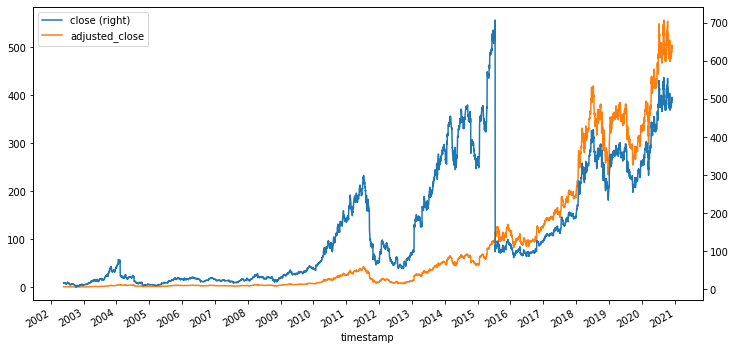

In [17]:
daily_apple_api_df = pd.read_csv('./daily_adjusted_NFLX.csv')[::-1]
daily_apple_api_df['timestamp'] = pd.to_datetime(daily_apple_api_df['timestamp'], format='%Y-%m-%d')

fig, ax = plt.subplots()
daily_apple_api_df[['timestamp', 'close','adjusted_close']].plot(x='timestamp', secondary_y='close', 
                                                                 ax=ax, rot=30, figsize=(12,6))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

bla bla

In [18]:
stock_split_df = text_df.loc[text_df['open'].str.contains('Stock Split'), ['date', 'open']]
stock_split_df.rename(columns={'open': 'split_type'}, inplace=True)
stock_split_df

date             split_type
company                                            
APPLE     371   Jun 21, 2000        2:1 Stock Split
          1548  Feb 28, 2005        2:1 Stock Split
          3892  Jun 09, 2014        7:1 Stock Split
          5487  Aug 31, 2020        4:1 Stock Split
AMAZON    2     Jan 05, 1999        3:1 Stock Split
          170   Sep 02, 1999        2:1 Stock Split
GOOGLE    2423  Apr 03, 2014  1998:1000 Stock Split
IBM       103   May 27, 1999        2:1 Stock Split
MICROSOFT 59    Mar 29, 1999        2:1 Stock Split
          1037  Feb 18, 2003        2:1 Stock Split
NETFLIX   435   Feb 12, 2004        2:1 Stock Split
          3310  Jul 15, 2015        7:1 Stock Split
TESLA     2562  Aug 31, 2020        5:1 Stock Split

Sự kiện tách cổ phiếu 2014-06-09 https://investor.apple.com/faq/default.aspx

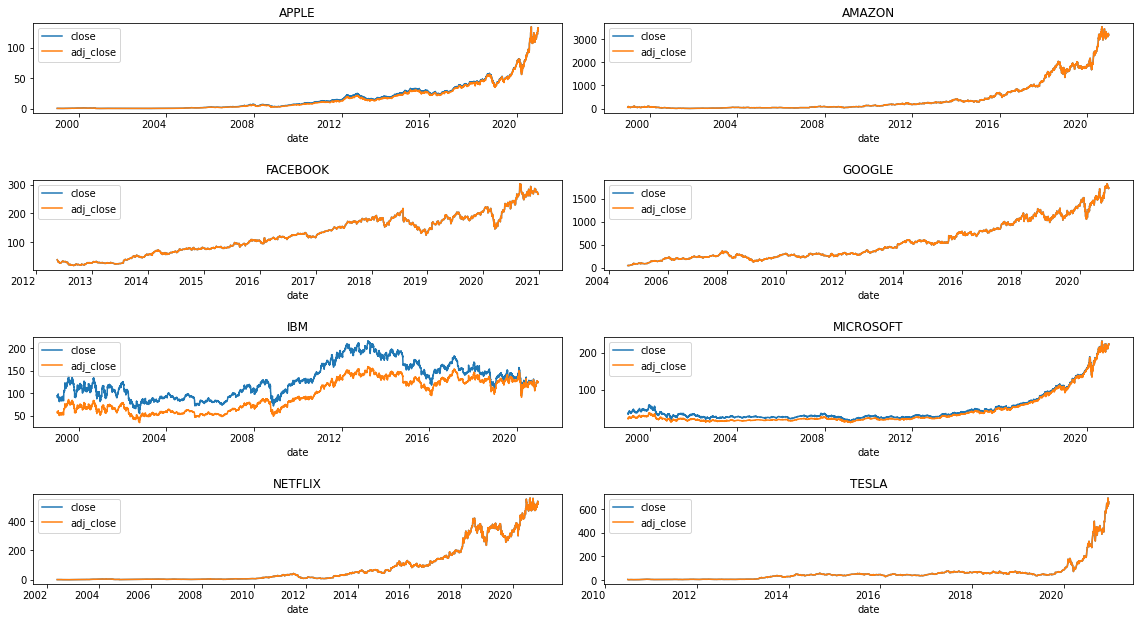

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,10))
fig.tight_layout(h_pad=6)
for i, comp in enumerate(company_dict.values()):
    daily_stock_df.loc[comp].plot(y=['close', 'adj_close'], ax=axes[i // 2, i % 2], title=comp, rot=0)

Giải thích sự biến động của `close`. Kết luận chọn `adjusted_close` để dự đoán.

---

## Phân tích, trả lời câu hỏi và kiểm chứng nhận định

Đầu tiên, trực quan hoá giá cổ phiểu của các công ty để có cái nhìn khái quát.
<a id="daily_stock_plot"></a>

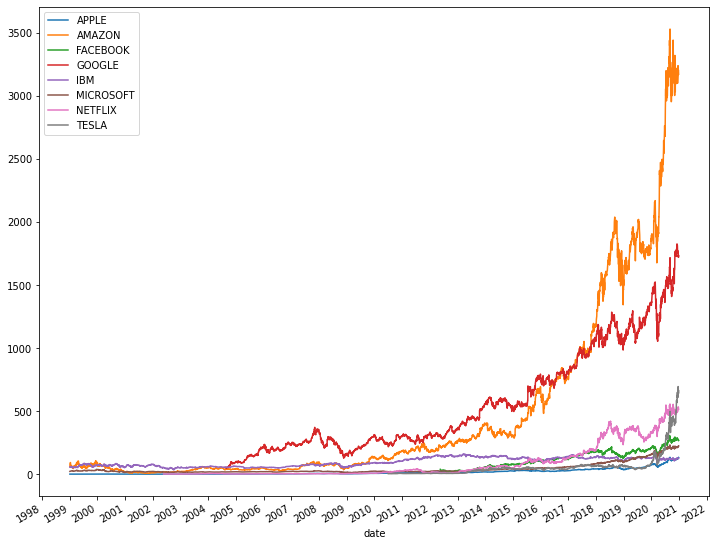

In [21]:
daily_close_df = pd.DataFrame(data={company: daily_stock_df.loc[company, 'adj_close'] 
                                    for company in company_dict.values()})
ax = daily_close_df.plot(figsize=(12,10))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

Nhận xét từ biểu đồ:
- Amazon là công ty có giá cổ phiểu cáo nhất, giá tăng trưởng ổn định và tăng nhiều trong năm 2020. Có thể do đại dịch Covid mà như cầu mua sắm trực tuyến tăng cao khiến công ty phát triển tốt.
- Google là công ty có giá cao thứ 2 sau Amazon, nhìn chung giá cổ phiếu có xu hướng tăng ổn định. Trước thời điểm 2016, công ty có giá cổ phiếu cao hơn Amazon, sau đó thì bị Amazon vượt qua. Có điều thú vị là từ sau năm 2018, cổ phiếu Google và Amazon có sự tương quan nhất định, chúng di chuyển cùng hướng.
- Các công ty còn lại có giá cổ phiếu khá thấp so với 2 câu ty dẫn đầu.

Cho các công ty trừ Google và Amazon sử dụng scale khác và phóng vào khoảng thời gian từ nằm 2010 trở lại đây để nhìn rõ hơn về sự biến động giá cổ phiếu của các công ty này. 

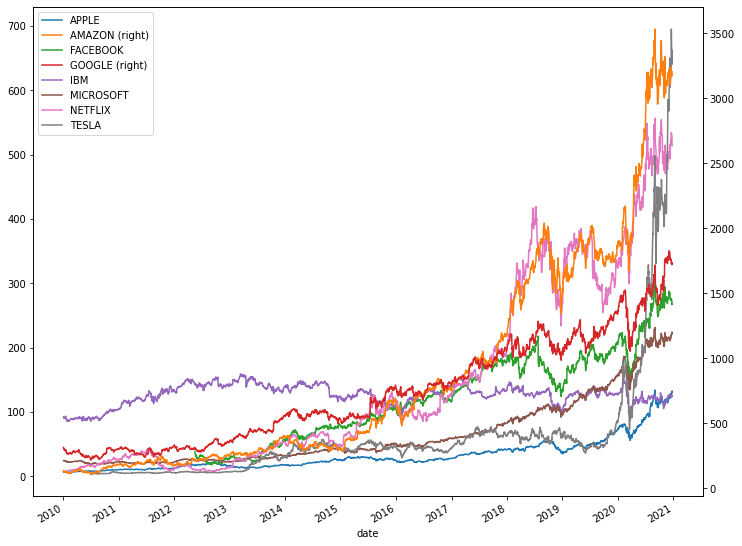

In [22]:
ax = daily_close_df.iloc[daily_close_df.index.get_loc(dt(2010,1,4)):]. \
                    plot(secondary_y=['AMAZON', 'GOOGLE'], figsize=(12,10))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

- Công ty có cổ phiếu có sự tăng trưởng mạnh và nổi bật nhất trong năm 2020 là Tesla. 
- Nhận thấy có thêm Facebook, Apple, Microsoft cũng có hướng di chuyển giá cổ phiếu có phần giống sự tương quan của Amazon và Google đã phát hiện ở biểu đồ trước (sẽ tiến thành phân tích độ tương quan giữa các cổ phiếu này sau)

**Câu hỏi:** Giá cổ phiếu sẽ thay đổi như thế nào khi có sự kiện tách cổ phiểu? 

Kì vọng: giá sẽ có xu hướng tăng trong khoảng thời gian ngắn hạn kế tiếp. Cổ phiếu được tách trước đó có giá khá cao, do đó cổ phiếu này đang có xu hướng tăng tốt. Khi đã được tách, giá của cổ phiếu giảm (tuy nhiên giá trị thì không đổi, do số cổ phiếu tăng nên giá phải điều chỉnh giảm để tổng vốn hoá giữ nguyên) cũng tăng khả năng được mua của nó với nhiều đối tượng hơn. Do các yếu tố trên mà cầu tăng và có thể dẫn tới giá tăng.

In [132]:
def visualize_stock_split(company, y):
    fig, axes = plt.subplots(nrows=len(stock_split_df.loc[company]), figsize=(8,10))
    fig.tight_layout(h_pad=5)
    for i, split in enumerate(stock_split_df.loc[company].values):
        try: ax = axes[i]
        except: ax = axes
        date = dt.strptime(split[0], '%b %d, %Y')
        idx = daily_stock_df.loc[company].index.get_loc(date)
        daily_stock_df.loc[company].iloc[idx - 30:idx + 60].plot.line(y=y,ax=ax, rot=0)
        ax.axvline(x=date, color='r', label="Split")
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.set_title(company + ' - ' + ' - '.join(split)); ax.legend(loc='upper left')

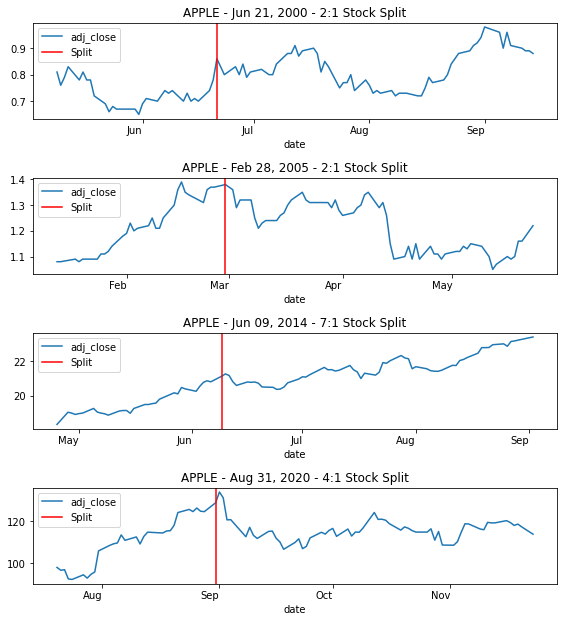

In [130]:
visualize_stock_split('APPLE', 'adj_close')

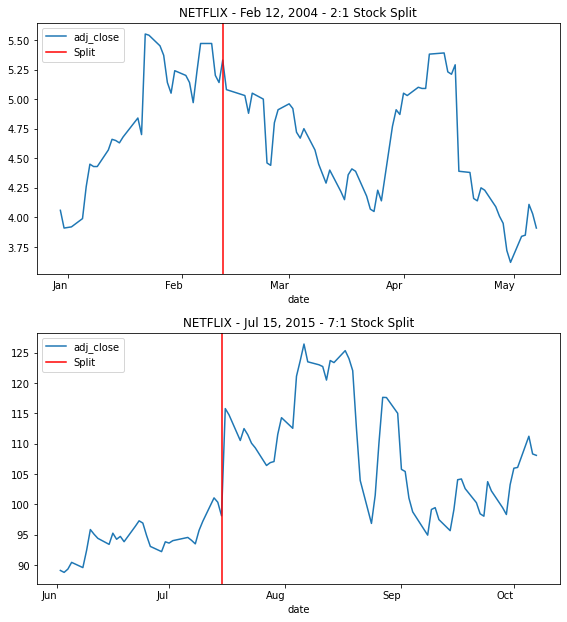

In [131]:
visualize_stock_split('NETFLIX', 'adj_close')

Trực quan hoá khoảng thời gian tách cổ phiếu (đường màu đỏ) của Apple và Netflix nhìn chung thấy sự tác động của việc tách cổ phiếu là không nhiều. Chỉ những đợt tách 7:1 (1 phiếu thành 7) thì giá cổ phiếu của Apple tăng ổn định một thời gian, của Netflix thì tăng đột ngộ sau đó giảm rồi lại tăng trong thời gian ngắn. 

**Kết luận:** tách cổ phiếu không trực tiếp làm tăng hay giảm giá trị của cổ phiếu, tuy nhiên có thể kích thích nhu cầu đầu tư vào ở đợt tách lớn giúp cổ phiếu tăng giá mặc dù không lâu dài và phụ thuộc các yếu tố khác của thị trường.

TODO: candle stick

---

**Câu hỏi:** Có sự tương quan giữa cổ phiếu của các công ty không?

Kỳ vọng: theo quan sát và nhận định từ [biểu đồ](#daily_stock_plot) giá cổ phiếu của các công ty thì có sự tương quan giữa các cổ phiếu. Các công ty có thể cạnh tranh trực tiếp hoặc một một mảng nào đó như Apple và Microsoft mảng hệ điều hành, hoặc cùng có lợi cho nhau hoặc cùng trải qua sự kiện kinh tế chung của thị trường dẫn tới dự tương quan.

Đầu tiên ta tính sự thay đổi của cổ phiếu theo từng ngày bằng cách tính phần trăm thay đổi giá cổ phiểu của mỗi 2 ngày liên tục theo công thức $\dfrac{\text{price}_t - \text{price}_{t - 1}}{\text{price}_{t - 1}}$. Như vậy, phần trăm càng lớn thì sự thay đổi càng lớn, phần trăm dương nghĩa là tăng so với hôm qua ngược lại là giảm.

Pandas có hỗ trợ với hàm `pct_change`

In [26]:
daily_pct_change = daily_stock_df.groupby(by='company')['adj_close'].pct_change() * 100

Trực quan dữ liệu của một số công ty.

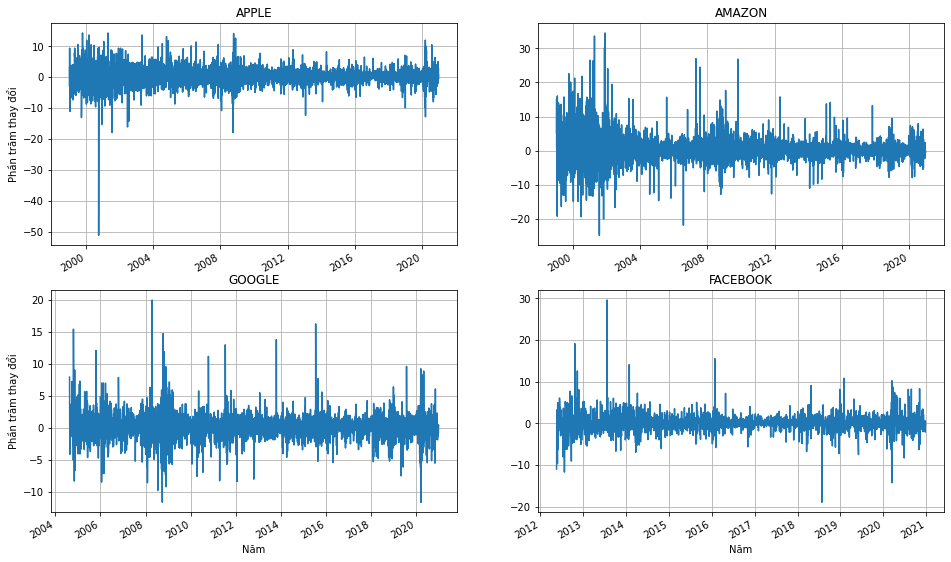

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
for i, company in enumerate(['APPLE', 'AMAZON', 'GOOGLE', 'FACEBOOK']):
    daily_pct_change.loc[company].plot(ax=axes[i // 2, i % 2], grid=True, title=company)
plt.setp(axes[-1, :], xlabel='Năm')
plt.setp(axes[ 0, :], xlabel='')
plt.setp(axes[ :, 0], ylabel='Phần trăm thay đổi');

- Có thể thấy tỉ lệ thay đổi qua từng ngày của các cổ phiếu thường giao động chính trong khoảng 5% và -5%, với một số ngày đạt đỉnh lên trong khoảng 20% và -20%.
- Những ngày đầu Amazon có biên độ giao động lớn và có lúc tăng vọt trên 30%.
- Apple có [kỷ lục](https://www.dividend.com/how-to-invest/apples-worst-day-ever-aapl/) giảm hơn 50%.

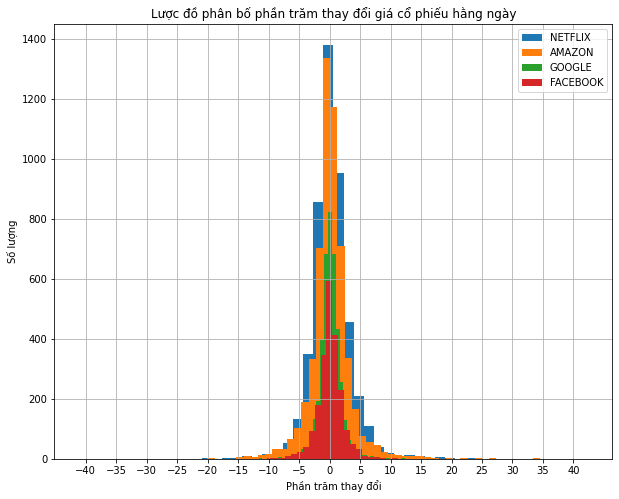

In [154]:
for company in ['NETFLIX','AMAZON', 'GOOGLE', 'FACEBOOK']:
    daily_pct_change.loc[company].hist(bins=50, figsize=(10,8), label=company)
    
plt.title('Lược đồ phân bố phần trăm thay đổi giá cổ phiếu hằng ngày')
plt.xticks(np.arange(-40, 41, 5)); plt.legend(loc='best')
plt.xlabel('Phần trăm thay đổi'); plt.ylabel('Số lượng');

Phần trăm thay đổi giá cổ phiếu có phân phối giống phân phối chuẩn, trung tâm ở giá trị 0%. Phân phối cho thấy giá cổ phiếu chủ yếu biến động trong khoảng vừa phải qua từng ngày trong khoảng thời gian xét.

Tiếp theo đến phần chính của câu hỏi. Ta vẽ biểu đồ tương quan giữa các cổ phiếu dựa trên phần trăm thay đổi qua từng ngày thay vì giá của cổ phiếu là vì các giá có scale khác nhau và giao động bất ổn khi đó ta chỉ nhìn vào chỉ tiết. Phần trăm thay đổi sẽ cho cái nhìn về độ tương quan ở mức tổng thể hơn, đó là một ngày tăng hay giảm và bao nhiêu phần trăm.

In [160]:
# Tạo df từ series daily_pct_change vì scatter_matrix cần tham số là df
daily_pct_change_df = pd.DataFrame({company: daily_pct_change.loc[company] 
                                    for company in company_dict.values()})['2015-01-04':]
daily_pct_change_df.head()

,APPLE,AMAZON,FACEBOOK,GOOGLE,IBM,MICROSOFT,NETFLIX,TESLA
date,,,,,,,,
2015-01-05,-2.811245,-2.051731,-1.606119,-1.905391,-1.571567,-0.914781,-5.095286,-4.195166
2015-01-06,0.000000,-2.283332,-1.347325,-2.467947,-2.153443,-1.482021,-1.712112,0.571157
2015-01-07,1.404959,1.059975,0.000000,-0.294094,-0.652720,1.282367,0.516129,-0.165641
2015-01-08,3.830481,0.683600,2.665791,0.348411,2.173181,2.946189,2.225075,-0.165916
2015-01-09,0.117739,-1.174865,-0.562804,-1.221124,0.428689,-0.851466,-1.548765,-1.875594


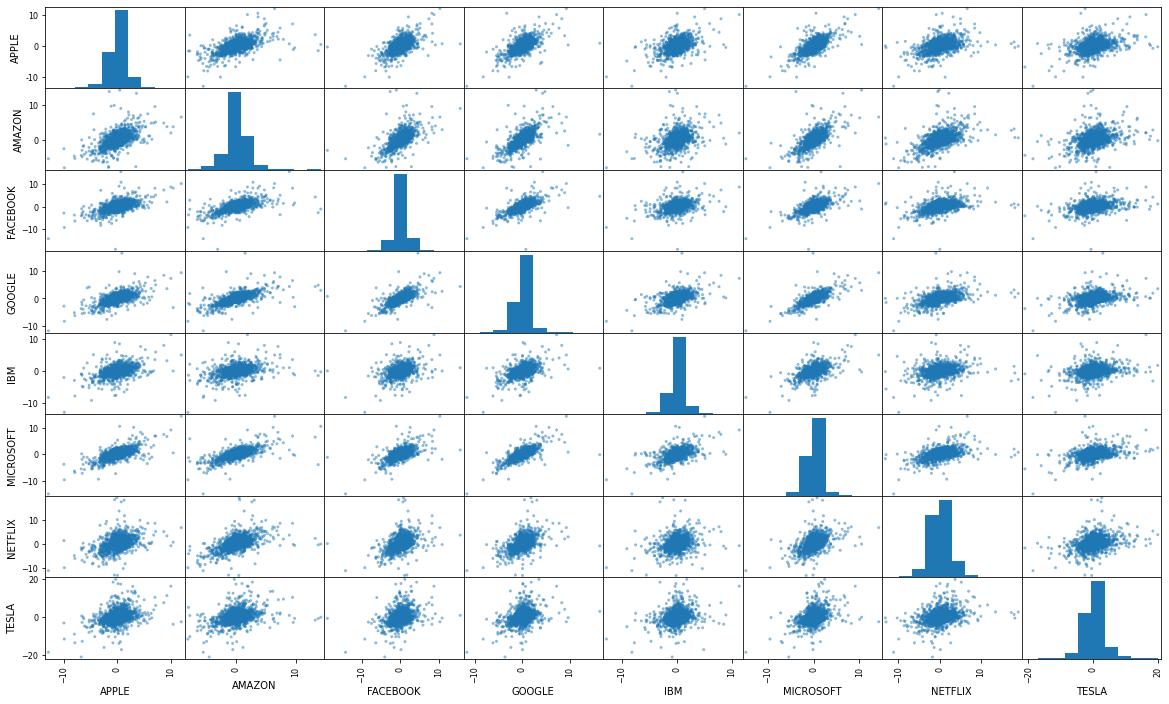

In [164]:
pd.plotting.scatter_matrix(daily_pct_change_df, figsize=(20,12));

bla bla

vẽ confusion matrix

---

**Câu hỏi**: Đánh giá rủi ro

---

## Câu hỏi cần trả lời

- Câu hỏi là gì? Bạn có gắng phát biểu câu hỏi cho rõ
ràng.
- Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

Cho lịch sử giá cổ phiểu của một công ty dự đoán giá cố phiếu của công ty đó những ngày tiếp theo?

Lợi ích: tham khảo https://www.datacamp.com/community/tutorials/lstm-python-stock-market#why

---

## Phân tích - mô hình hoá dữ liệu

In [28]:
stock_df['close'].plot.line()

NameError: name 'stock_df' is not defined

---

## Tham khảo

Thu thập dữ liệu: 
- [Document của Selenium](https://selenium-python.readthedocs.io/)
- [Document của Alphavantage](https://www.alphavantage.co/documentation/)
- Pandas: https://beenje.github.io/blog/posts/parsing-html-tables-in-python-with-pandas/

Phân tích dữ liệu:
- [Investopedia - Trang kiến thức về chứng khoáng](https://www.investopedia.com/)
- [Một số hướng dẫn phân tích dữ liệu chứng khoán](https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/)

Mô hình hoá dữ liệu:
- ...
- ...

## Xoá sau khi tổng kết lại

## Nháp

In [ ]:
# code cũ
# missing_dates = pd.Series(pd.date_range(start=stock_df.index.min(), end=stock_df.index.max()).
#                           difference(pd.to_datetime(stock_df.index)))
# missing_dates.groupby([missing_dates.dt.year, missing_dates.dt.month]).agg({'count'})
# for company in ['AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT', 'NFLX', 'TSLA']:
#     print('Company', company)
#     stock_df = pd.read_csv('daily_adjusted_' + company + '.csv', index_col='timestamp')
#     print('Total dates:', len(stock_df))
#     print('Start date:', stock_df.index.min())
#     print('End date:', stock_df.index.max())
#     missing_dates = pd.Series(pd.date_range(start=stock_df.index.min(), end=stock_df.index.max()).
#                               difference(pd.to_datetime(stock_df.index)))
#     missing_dates_counts = missing_dates.groupby([missing_dates.dt.year, missing_dates.dt.month]).agg({'count'})
#     print('Total missing date:', len(missing_dates))
#     print('Median of missing date per month:', missing_dates_counts.median()[0])
#     print('Average of missing date per month:', missing_dates_counts.median()[0])
#     print('\n\n')